# Kaggle Diamonds Analysis Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Objective
---

 Kaggle's [Diamond - Machine Learning from](https://www.kaggle.com/datasets/shivam2503/diamonds?select=diamonds.

## Title
#### Antone Smith

### Problem Definition
Does diamond clarity effect the price of diamonds

##Column Explaination 

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

______


### Sourcing Data
Quickly describe the content of the data, citing the source, and explaining why you believe this dataset can be used to solve your problem.

In [ ]:
# Load the data from its source format into a pandas dataframe
import pandas as pd

In [ ]:
# Quick overview of data using pandas methods
path = '/content/drive/MyDrive/Career class data project/diamonds 2.csv'
diamond_df = pd.read_csv(path)

In [ ]:
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Ensuring anything worth noting is captured in text via Markdown cells after the outputs.

### Data Cleaning
This section should contain all of your data cleaning. Document your approach in markdown as such:

In [ ]:
#checking the dataset to see if there is any null values that may need to be cleaned
diamond_df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
#Luckly there is no null values in this data
#Now we need to explore what values may need to be changed for a better analysis

In [ ]:
#We already have a index column
#Column labeled unnamed has no relavance to this dataset because of this it can be deleted
diamond_df.drop('Unnamed: 0', axis=1, inplace=True)

diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
diamond_df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
diamond_df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
diamond_df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib_inline


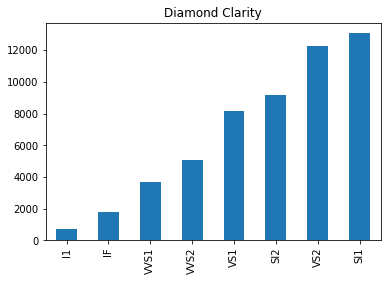

In [ ]:
diamond_df["clarity"].value_counts().sort_values().plot(kind="bar" , title = "Diamond Clarity")

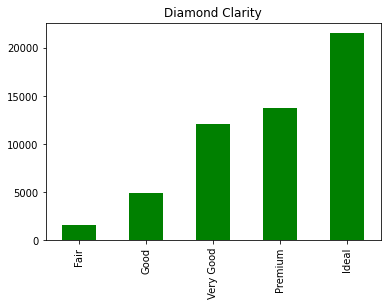

In [ ]:
diamond_df["cut"].value_counts().sort_values().plot(kind="bar",color = 'green' , title = "Diamond Cut")

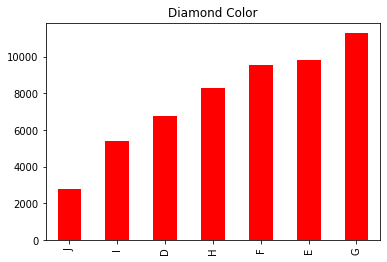

In [ ]:
diamond_df["color"].value_counts().sort_values().plot(kind="bar",color = 'red' , title = "Diamond Color")

In [ ]:
data = diamond_df["clarity"]

In [ ]:
diamond_df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


The clarity, color and  cut column does not show up in the correlation because the variables in that column is nominal. 
We need to fix this before we can start any analysis.

In [ ]:
# made color, cut and clarity into ordianal values because variable was in order by ranks
color = {'color': {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}}
cut = {'cut': {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5,}}
clarity = {'clarity': {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}}

diamond_df.replace(color, inplace=True)
diamond_df.replace(cut, inplace=True)
diamond_df.replace(clarity, inplace=True)


In [ ]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


### Exploratory Data Analysis


In [ ]:
#now color, cut and clarity is shown when looking at the correlated values

corr = diamond_df.corr()
corr

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
#let make a heatmap the give a better visual representation of the corration to better under the relationships between columns
import seaborn as sns

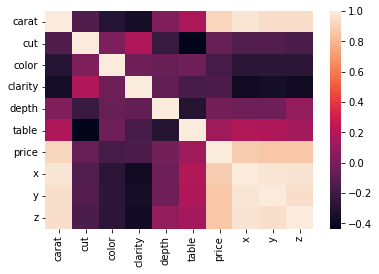

In [ ]:
sns.heatmap(corr)

In [ ]:
#very surprised  that the cut correlation is so low 
#along with the negative correlation with color and clarity
diamond_df.corr()['price']

carat      0.921591
cut       -0.053491
color     -0.172511
clarity   -0.146800
depth     -0.010647
table      0.127134
price      1.000000
x          0.884435
y          0.865421
z          0.861249
Name: price, dtype: float64

In [ ]:
import numpy as np

In [ ]:
#lets try One_Hot encode to see if they it may alter the diamond cut correlation

In [ ]:
diamond_column_as_array = np.array(diamond_df['cut'])

In [ ]:
diamond_column_as_array

array([5, 4, 2, ..., 3, 4, 5])

In [ ]:
diamond_cut_column_as_array = diamond_column_as_array.reshape(-1, 1)
diamond_cut_column_as_array

array([[5],
       [4],
       [2],
       ...,
       [3],
       [4],
       [5]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Pass column into
enc.fit(diamond_cut_column_as_array)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Note this is a nested array, so we have to unpack woth [0]
enc.categories_[0]

array([1, 2, 3, 4, 5])

In [ ]:
# Insert the values & transform them
one_hot_encoded_d_cut = enc.transform(diamond_cut_column_as_array)

one_hot_encoded_d_cut

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
d_cut_one_hot = pd.DataFrame(data=one_hot_encoded_d_cut, columns=enc.categories_[0])

d_cut_one_hot

,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
53935,0.0,0.0,0.0,0.0,1.0
53936,0.0,1.0,0.0,0.0,0.0
53937,0.0,0.0,1.0,0.0,0.0
53938,0.0,0.0,0.0,1.0,0.0


In [ ]:
 #add  price column so we can better look at the correlation before model

d_cut_one_hot['price'] = diamond_df['price']
d_cut_one_hot.corr()['price']

1        0.018728
2       -0.000312
3        0.006593
4        0.095706
5       -0.097175
price    1.000000
Name: price, dtype: float64

In [ ]:
#seems like the correlation was worst now there we one hot ecoded it
#one benefit we see how each value from 1 - 5 correlates with the price
#one thing which is surprising is the highest cut has a negative correlation with price
#I would assume the higher the cut the higer the price but I may be wrong looking at this data

In [ ]:
diamond_df.corr()
#since x, y,z along with table has a positive correlation on the price
#I will futher explore those variable and make a model using those values

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
#x,y,z is somewhat confusing so lets change the the columns name to
#x = length 

#y = width 

#z = inner_depth 

In [ ]:
diamond_df.rename({'x': 'length', 'y': 'width', 'z': 'inner_depth' }, axis=1, inplace=True)

In [ ]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,length,width,inner_depth
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### Data Processing


In [ ]:
#predictors included in our training 
#as mentioned before selected these because of the store correlation to price
high_correlation= diamond_df[['length', 'width', 'inner_depth', 'table','price']]

In [ ]:
high_correlation.corr()['price']

length         0.884435
width          0.865421
inner_depth    0.861249
table          0.127134
price          1.000000
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x , y = high_correlation.drop(['price'], axis=1), high_correlation['price']
x_train , y_train = x, y


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size =0.2, random_state= 30)
y=y.astype('int') 

In [ ]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score

In [ ]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.008620689655172414

In [ ]:
#lets try using random forest to see if we can get a stronger score
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#ss is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs.

In [ ]:
regressor = RandomForestRegressor(n_estimators=20, random_state=30)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


In [ ]:
from sklearn import metrics

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 818.1079888893422
Mean Squared Error: 2097029.5639972286
Root Mean Squared Error: 1448.1124141437463


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


r2 is the variance of there data of how the model understand the data

In [ ]:
lr=LinearRegression()
lr.fit(x_train, y_train)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7858980084781026
0.77924698284911


78% accuracy 